<img src="Figs\ul_logo.png" alt="ul_logo" align="left" width="200" height="100"/>

<br/><br/><br/><br/>
<h3><center> Cahier de laboratoire </center></h3><br/><br/><br/><br/><br/>
    
<center> Travaux pratiques avancés (GPH-3000) </center> <br /><br/><br/><br/><br/><br/>

<center> présenté à </center>
<center> Simon Rainville et Michel Piché </center> <br /><br/><br/><br/><br/><br/>

<center> par </center>
<center> Maxence Larose (111 188 447 - maxence.larose.1@ulaval.ca) </center>
<center> Pierre-Olivier Janvier (111 187 987 - pierre-olivier.janvier.1@ulaval.ca) </center><br /><br/><br/><br/><br/><br/><br/>

<center> Automne 2020 </center><br/><br/><br/>

<div style="page-break-after: always;"></div>

#### Expérience 4.2 : Laser à fibre femtoseconde (Simulation)

## Préparation

**Date de préparation :** 15 octobre 2020

**Date de l'expérimentation :** 15 octobre 2020

**But : Optimiser les réglages d'un système P-APM et obtenir des résultats en régime solitonique avec le code de simulation pour éventuellement comparer avec les résultats expérimentaux du laser à fibre dopée erbium du laboratoire.** 

**Objectifs spécifiques:**
- Optimiser les réglages du système P-APM en maximisant la pente à l'origine de la fonction de transmission du système.
- Utiliser les conditions optimales trouvées pour obtenir une impulsion solitonique avec le code de simulation sur MatLab
- Comparer avec les résultats expérimentaux.
- Examinez les résultats obtenus avec des réglages non optimisés des paramètres du système P‐APM.

**Matériel nécessaire:**	
- Code de simulation de laser femtoseconde sur MatLab
- Thèse de Michel Olivier

### Partie 1 : Optimisation du réglage du système P-APM. 

Afin d'optimiser les réglages du système, la pente à l’origine de la fonction de transmission du système P‐APM doit être maximisée. Ainsi, on utilise l’expression analytique de la fonction de transmission suivante
\begin{align}
\frac{P_{\text {out}}}{P_{\text {in}}}=\frac{\left|A_{x}^{\text {out}}\right|^{2}}{\left|A_{x}^{\text {in}}\right|^{2}}=\frac{1}{2}(1+\cos (2 \alpha) \cos [2(\alpha-2 \theta)+\Delta \phi]),
\end{align}
où on a que l'angle de rotation non linéaire est donné par
\begin{align}
\Delta \phi=-\frac{\gamma L}{3} \sin (2 \alpha) P.
\end{align}
La seconde équation est d'abord substituée dans l'équation de transmission. Ensuite, la dérivée de la première équation par rapport à $P$ est réalisée et les valeurs des paramètres $\alpha$ et $\theta$ qui maximise cette dérivée lorsque $P=0$ sont déterminées de manière analytique à l'aide des calculs suivants.

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from math import cos, sin, pi
from sympy import *

Max used for simulation is α = 0.39624 rad, θ = -0.19497 rad.


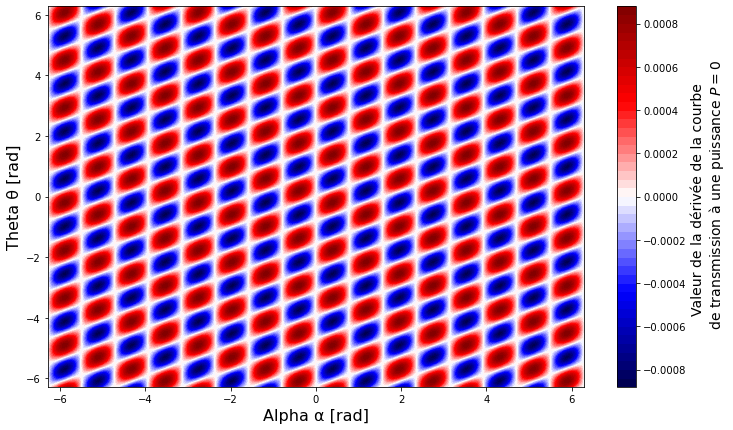

In [3]:
gamma_SMF = 1.4e-3
L_SMF = 3
gamma_HI = 3.16e-3
L_HI = 0.5
gamma_DRAKA = 4.6e-3
L_DRAKA = 1

gammaL = gamma_SMF*L_SMF + gamma_HI*L_HI + gamma_DRAKA*L_DRAKA
alpha, theta, P = symbols('alpha theta P', real=True)

T = 1/2*(1+cos(2*alpha)*cos(2*(alpha-2*theta)-((gammaL)/3)*sin(2*alpha)*P))
dT_symbol = diff(T, P)
dT = lambdify([alpha, theta, P], dT_symbol)

alpha = np.linspace(-2*np.pi, 2*np.pi, 1000)
theta = np.linspace(-2*np.pi, 2*np.pi, 1000)

A, T = np.meshgrid(alpha, theta)
Z = dT(A, T, P=0)
i, j = np.where(Z >= (np.max(Z) - 0.0000001))

max_pairs = [pairs for pairs in zip(alpha[j], theta[i])]

# print('Max at \n', np.asarray(max_pairs))

print('Max used for simulation is α = {:.5f} rad, θ = {:.5f} rad.'.format(0.39623691, -0.19497372))

plt.contourf(A, T, Z, cmap='seismic', levels=50)
plt.xlabel('Alpha α [rad]', fontsize=16)
plt.ylabel('Theta θ [rad]', fontsize=16)
# plt.xticks([-2*np.pi, -np.pi, 0, np.pi, 2*np.pi], ['-2$\pi$', '-$\pi$', '0', '$\pi$', '2$\pi$'], fontsize=16)
# plt.yticks([-2*np.pi, -np.pi, 0, np.pi, 2*np.pi], ['-2$\pi$', '-$\pi$', '0', '$\pi$', '2$\pi$'], fontsize=16)
cbar = plt.colorbar()
cbar.set_label(label='Valeur de la dérivée de la courbe \n de transmission à une puissance $P=0$', fontsize=14)
fig = plt.gcf()
fig.set_size_inches(12, 7)
fig.savefig('alpha_theta.pdf', bbox_inches='tight', dpi=600)
plt.show()

Les paramètres utilisés pour la simulation sont donc $\alpha$ = 0.39624 rad et $\theta$ = -0.19497 rad. D'autres maxima de la figure précédente auraient pu être utilisés. Par ailleurs, la section suivante présente les calculs reliés aux paramètres de la fibre SMF-28 utilisé lors des expérimentations au laboratoire.

In [4]:
lambda0 = 1559.5e-9
c = 3e8
Dmode = 10.4e-6
Aeff = np.pi*(Dmode/2)**2
v0 = c/lambda0
n2 = 2.6e-20
gamma = (2*np.pi*n2*v0)/(c*Aeff)

print('gamma = ', gamma)

D = 18e-06 # s/m^2

beta = -(D*lambda0**2)/(2*np.pi*c)

print('beta = ', beta)

gamma =  0.0012331368535280043
beta =  -2.322427365515694e-26


In [24]:
delta_lo = 9.95e-09
delta_freq = (c/(lambda0**2))*delta_lo
print('Delta v=', delta_freq)

t0 = 0.1786/delta_freq
print('t0=', t0)

Delta_t = 1.76*t0
print('Delta_t=', Delta_t)

freq0 = c/lambda0
print('v0=', freq0)

beta_moy = -1.6111111111e-26
gamma_moy = 2.193333333e-3

P0 = (-1*beta_moy)/(gamma_moy*t0**2)
print('P0=', P0)

U = 2*t0*P0
print('U=', U)

Delta v= 1227364555335.7925
t0= 1.4551503807370187e-13
Delta_t= 2.561064670097153e-13
v0= 192369349150368.7
P0= 346.90063867482604
U= 1.0095851928911761e-10


In [15]:
B2= (3*beta) + (0.5*-5.8e-27)
print('B2=', B2)

m = 3
vm_plus = freq0 + ((m/(np.pi*-1*B2))-1/(4*(np.pi**2)*(t0**2)))**0.5
vm_moins = freq0 - ((m/(np.pi*-1*B2))-1/(4*(np.pi**2)*(t0**2)))**0.5

lambda_plus = c/vm_plus
lambda_moins = c/vm_moins
print('$\lambda$+=', lambda_plus)
print('$\lambda$-=', lambda_moins)


B2= -7.257282096547082e-26
$\lambda$+= 1.531956949360129e-06
$\lambda$-= 1.5880515758059786e-06


### Partie 2 : Convergence vers un soliton.

Ensuite, afin de pouvoir plus tard comparer les résultats de simulation avec ceux expérimentaux,le profil d'un soliton a été obtenu avec le simulateur matlab fourni et à l'aide des paramètres $\alpha$ et $\theta$ optimaux trouvés dans la partie 1. Ainsi, avec un $\alpha$ = 0.39624 rad et $\theta$ = -0.19497 rad on obtient la figure suivante
<img src="Figs\alpha_0.3962rad_theta_-0.195rad_lambda_1.5595e-06nm.png" alt="ul_logo" align="center" style="zoom:80%"/>
<center> FIGURE 1 : Profil d'un soliton obtenu avec les condtions optimales pour $\alpha$ et $\theta$.  </center> <br/>

Les différentes données obtenues lors de la simulation ont aussi été enregistrées et sont disponibles dans un fichier nommé 
$\textit{alpha_0.3962rad_theta_-0.195rad_lambda_1.5595e-06nm.mat}$ qui correspont aux paramètres de simulation utilisés. Pour ce qui est de l'analyse de cette figure et des différents résultats découlant de celle-ci, ceux-ci seront présentés lors de la rédaction du rapport.

### Partie 3 : Convergence vers un soliton.
Finalement, afin de tester le comportement du système dans des conditions non optimales, différents profil on été obtenus en changeant les paramètres $\alpha$ et $\theta$ de manière à les rendre non optimaux. Les différentes figures obtenues sont présentés ci-dessous accompagnées des paramètres $\alpha$ et $\theta$ utilisés.
<img src="Figs\alpha_0.3987rad_theta_-0.1925rad_lambda_1.5595e-06nm.png" alt="ul_logo" align="center" style="zoom:80%"/>
<center> FIGURE 2 : Profil d'un soliton obtenu avec les condtions non optimales pour un $\alpha$ de 0.3987 et un $\theta$ de -0.1925.  </center> <br/>

<img src="Figs\alpha_0rad_theta_0rad_lambda_1.5595e-06nm.png" alt="ul_logo" align="center" style="zoom:80%"/>
<center> FIGURE 3 : Profil d'un soliton obtenu avec les condtions non optimales pour un $\alpha$ de 0 et un $\theta$ de 0.  </center> <br/>

<img src="Figs\alpha_1.42rad_theta_2.597rad_lambda_1.5595e-06nm.png" alt="ul_logo" align="center" style="zoom:80%"/>
<center> FIGURE 4 : Profil d'un soliton obtenu avec les condtions non optimales pour un $\alpha$ de 1.42 et un $\theta$ de 2.597.  </center> <br/>

<img src="Figs\alpha_1.358rad_theta_1.07rad_lambda_1.5595e-06nm.png" alt="ul_logo" align="center" style="zoom:80%"/>
<center> FIGURE 5 : Profil d'un soliton obtenu avec les condtions non optimales pour un $\alpha$ de 1.358 et un $\theta$ de 1.07.  </center> <br/>

Comme il est possible de remarquer dans les figures 2 à 5, les profils changent radicalement selon les paramètres $\alpha$ et $\theta$. En effet, certain d'entre eux ne semblent pas présenter de comportement associé à un régime solitonique. Cela peut être causé par plusieurs choses. Une raison évidente serait que la simulation demanderait plus d'itérations avant de converger et finirai ainsi par démontrer les caractéristiques d'un tel régime. Par contre, en comparant, par exemple, la figure 2 avec la figure 1 on peut remarquer qu'il est tout de même possible d'obtenir un soliton même en utilisant des paramètres non optimaux. De plus, il est aussi possible de remarquer que peu importe la forme de l'impulsion résultante, la puissance pic de celle-ci varie grandement et proportionnelement selon la qualité du soliton obtenu.